In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/jarispolly/Downloads/Corona-Sars-Dataset/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv')

In [5]:
df.head()

,Details,Accession,Release_Date,Species,Genus,Family,Length,Genotype,Genome_Region,Segment,Protein,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NaN,YP_009724389,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,7096,NaN,NaN,NaN,orf1ab polyprotein,China,Homo sapiens,NaN,2019-12,NaN,orf1ab polyprotein [Wuhan seafood market pneum...
1,NaN,YP_009725255,2020-01-17T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,38,NaN,NaN,NaN,ORF10 protein,China,Homo sapiens,NaN,2019-12,NaN,ORF10 protein [Wuhan seafood market pneumonia ...
2,NaN,YP_009725295,2020-01-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,4405,NaN,NaN,NaN,orf1a polyprotein,China,Homo sapiens,NaN,2019-12,NaN,orf1a polyprotein [Wuhan seafood market pneumo...
3,NaN,YP_009725296,2020-01-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,43,NaN,NaN,NaN,ORF7b,China,Homo sapiens,NaN,2019-12,NaN,ORF7b [Wuhan seafood market pneumonia virus]
4,NaN,YP_009724390,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,1273,NaN,NaN,NaN,surface glycoprotein,China,Homo sapiens,NaN,2019-12,NaN,surface glycoprotein [Wuhan seafood market pne...


## Frequency of occurrence for the "Genus" category

In [6]:
genus_frequency = df['Genus'].value_counts()
print(genus_frequency)

Betacoronavirus    464
Name: Genus, dtype: int64


### Calculate the mean length

In [7]:
mean_length = df['Length'].mean()
print("Mean Length:", mean_length)

Mean Length: 926.2931034482758


### Convert "Collection_Date" column to pandas datetime format

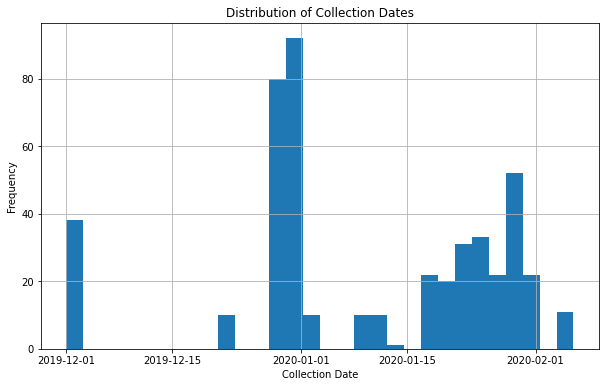

In [8]:
import matplotlib.pyplot as plt

df['Collection_Date'] = pd.to_datetime(df['Collection_Date'])

# Plot histogram of collection dates
plt.figure(figsize=(10, 6))
df['Collection_Date'].hist(bins=30)
plt.xlabel('Collection Date')
plt.ylabel('Frequency')
plt.title('Distribution of Collection Dates')
plt.show()

## Calculate the median and standard deviation of the "Length" column

In [9]:
median_length = df['Length'].median()
std_length = df['Length'].std()

print("Median Length:", median_length)
print("Standard Deviation of Length:", std_length)

Median Length: 121.0
Standard Deviation of Length: 2006.2790710369934


In [10]:
# Calculate quartiles for the "Length" column
q1_length = df['Length'].quantile(0.25)
median_length = df['Length'].quantile(0.50)
q3_length = df['Length'].quantile(0.75)

print("1st Quartile (Q1):", q1_length)
print("Median (Q2):", median_length)
print("3rd Quartile (Q3):", q3_length)

1st Quartile (Q1): 75.0
Median (Q2): 121.0
3rd Quartile (Q3): 419.0


In [15]:
# "Length," "Protein," and "Geo_Location"
correlation_matrix = df[['Length', 'Protein']].corr()
print(correlation_matrix)

        Length
Length     1.0


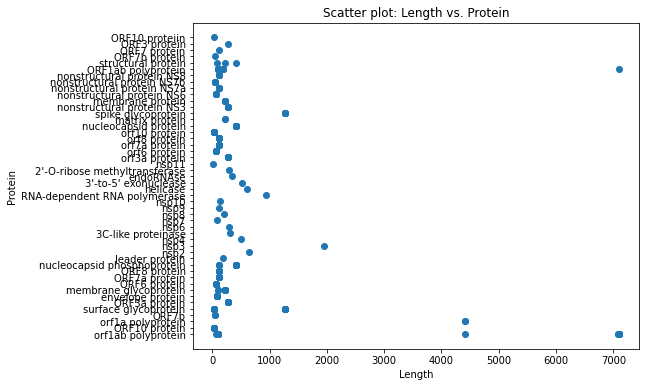

In [16]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between "Length" and "Protein"
plt.figure(figsize=(8, 6))
plt.scatter(df['Length'], df['Protein'])
plt.xlabel('Length')
plt.ylabel('Protein')
plt.title('Scatter plot: Length vs. Protein')
plt.show()

In [ ]:
# Hard to read,will only be analyzing aisian countries + us

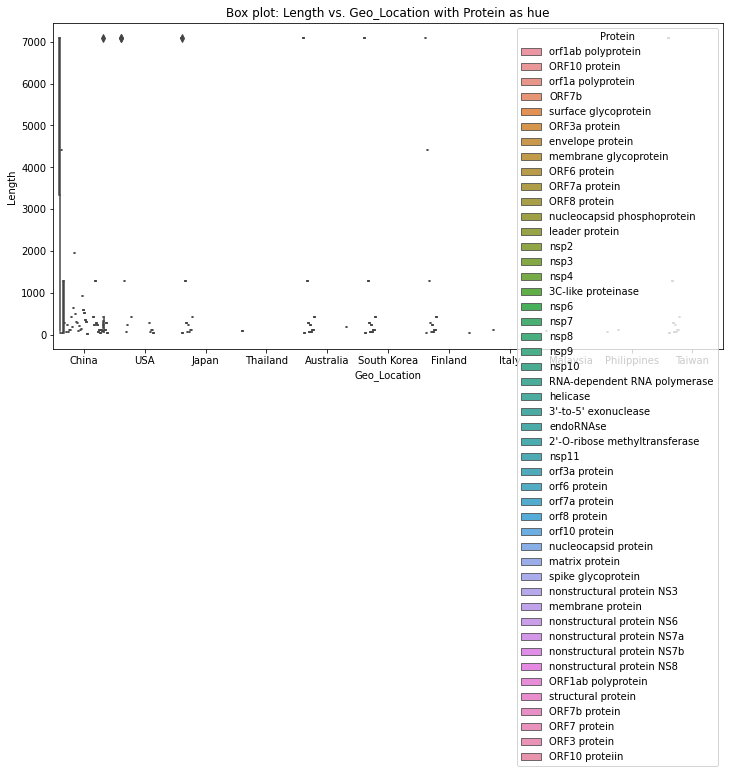

In [17]:
import seaborn as sns

# Box plot to visualize the relationship between "Length" and "Protein" for each "Geo_Location"
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geo_Location', y='Length', hue='Protein', data=df)
plt.xlabel('Geo_Location')
plt.ylabel('Length')
plt.title('Box plot: Length vs. Geo_Location with Protein as hue')
plt.show()

In [ ]:
# Hard to read,will only be analyzing aisian countries + us

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a Pandas DataFrame called df

# Create a list of Asian countries (modify this list as needed)
asian_countries = ['Japan', 'China', 'South Korea', 'India', 'Thailand', 'Vietnam', 'Indonesia']


In [19]:
# Filter the DataFrame to include only Asian countries and the USA
filtered_df = df[df['Geo_Location'].isin(asian_countries + ['USA'])]

# Calculate the correlation matrix for "Length" and "Protein" in the filtered DataFrame
correlation_matrix = filtered_df[['Length', 'Protein']].corr()

print(correlation_matrix)


        Length
Length     1.0


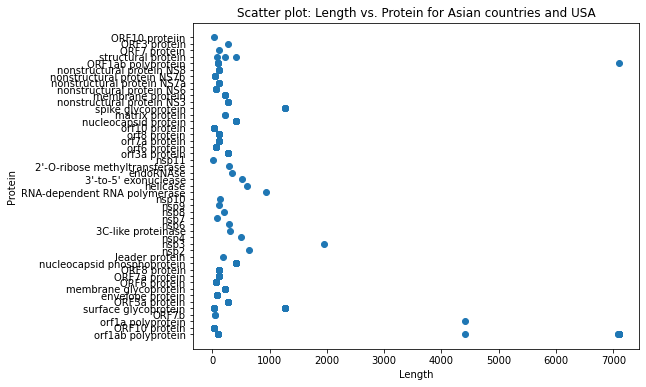

In [20]:

# Scatter plot to visualize the relationship between "Length" and "Protein" for Asian countries and the USA
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Length'], filtered_df['Protein'])
plt.xlabel('Length')
plt.ylabel('Protein')
plt.title('Scatter plot: Length vs. Protein for Asian countries and USA')
plt.show()

In [ ]:
# Hard to read,will only be analyzing aisian countries + us AND most "popular" protein mutatioons

In [21]:
# Assuming you have loaded your dataset into a Pandas DataFrame called df

# Create a list of Asian countries (modify this list as needed)
asian_countries = ['Japan', 'China', 'South Korea', 'India', 'Thailand', 'Vietnam', 'Indonesia']

# Filter the DataFrame to include only Asian countries
asian_df = df[df['Geo_Location'].isin(asian_countries)]

# Find the most common protein in the Asian countries
most_common_protein = asian_df['Protein'].value_counts().idxmax()

print("The most common protein in Asian countries is:", most_common_protein)


The most common protein in Asian countries is: orf1ab polyprotein


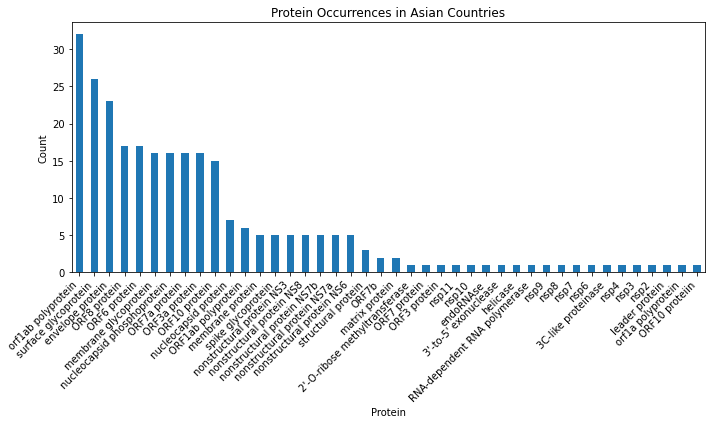

In [22]:
# Count occurrences of each protein
protein_counts = asian_df['Protein'].value_counts()

# Create a bar chart to visualize protein occurrences
plt.figure(figsize=(10, 6))
protein_counts.plot(kind='bar')
plt.xlabel('Protein')
plt.ylabel('Count')
plt.title('Protein Occurrences in Asian Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Hard to read,will only be analyzing aisian countries + us AND most "popular" protein mutatioons

In [23]:
# Filter the DataFrame to include only the rows corresponding to Asian countries and the specified proteins
selected_proteins = ['orf1ab polyprotein', 'surface glycoprotein', 'envelope protein']
asian_proteins_df = df[df['Geo_Location'].isin(asian_countries) & df['Protein'].isin(selected_proteins)]

In [24]:
# Group the data by the "Protein" column and calculate summary statistics for "Length"
protein_length_summary = asian_proteins_df.groupby('Protein')['Length'].describe()

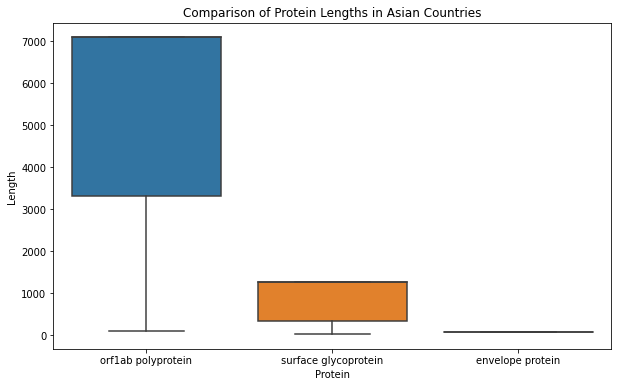

In [25]:
# Visualize the distribution of protein lengths for the selected proteins using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Protein', y='Length', data=asian_proteins_df)
plt.xlabel('Protein')
plt.ylabel('Length')
plt.title('Comparison of Protein Lengths in Asian Countries')
plt.show()

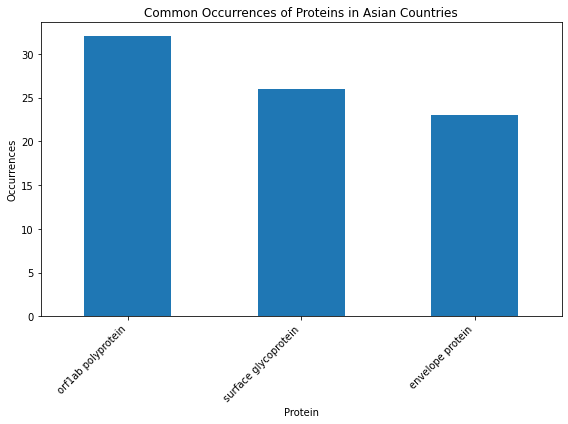

In [27]:
# Count occurrences of each protein in Asian countries
protein_occurrences = asian_proteins_df['Protein'].value_counts()

# Visualize the common occurrences of proteins in Asian countries using a bar chart
plt.figure(figsize=(8, 6))
protein_occurrences.plot(kind='bar')
plt.xlabel('Protein')
plt.ylabel('Occurrences')
plt.title('Common Occurrences of Proteins in Asian Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Create a list of Asian countries (modify this list as needed)
asian_countries = ['Japan', 'China', 'South Korea', 'India', 'Thailand', 'Vietnam', 'Indonesia']

# Filter the DataFrame to include only the rows corresponding to Asian countries and the specified proteins
selected_proteins = ['orf1ab polyprotein', 'surface glycoprotein', 'envelope protein']
asian_proteins_df = df[df['Geo_Location'].isin(asian_countries) & df['Protein'].isin(selected_proteins)]

In [36]:
# Group the data by "Geo_Location" and "Protein" and count occurrences of each protein in each country
protein_occurrences_by_country = asian_proteins_df.groupby(['Geo_Location', 'Protein']).size().unstack(fill_value=0)

# Reset index to make "Geo_Location" a regular column
protein_occurrences_by_country.reset_index(inplace=True)

In [37]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

<Figure size 864x432 with 0 Axes>

In [40]:
bar_width = 0.2
x = range(len(asian_countries))

In [ ]:
# NEEDS REVIEW MOVING FORWARD

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (4,).

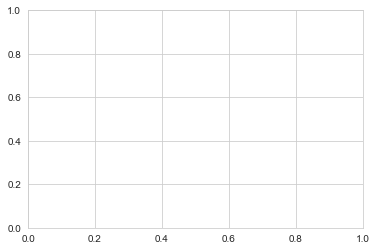

In [41]:
for i, protein in enumerate(selected_proteins):
    x_protein = [pos + i * bar_width for pos in x]
    plt.bar(x_protein, protein_occurrences_by_country[protein], width=bar_width, label=protein)

In [39]:
# Create a bar for each country and each protein
bar_width = 0.2
x = range(len(asian_countries))
for i, protein in enumerate(selected_proteins):
    plt.bar(protein_occurrences_by_country[protein], width=bar_width, label=protein)

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:

# Add country names as x-axis labels
plt.xlabel('Asian Countries')
plt.ylabel('Occurrences')
plt.title('Occurrences of Selected Proteins in Asian Countries')
plt.xticks([pos + bar_width for pos in x], asian_countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (4,).

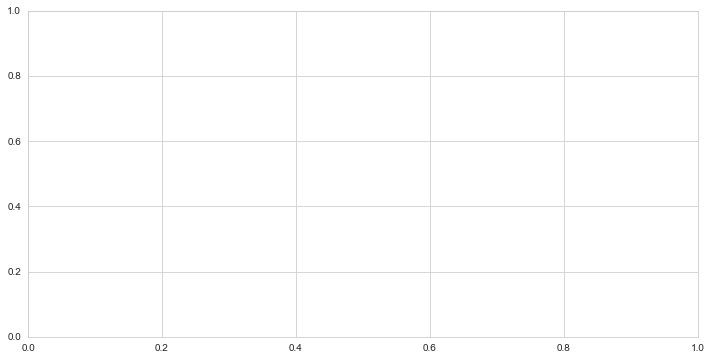

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a Pandas DataFrame called df

# Create a list of Asian countries (modify this list as needed)
asian_countries = ['Japan', 'China', 'South Korea', 'India', 'Thailand', 'Vietnam', 'Indonesia']

# Filter the DataFrame to include only the rows corresponding to Asian countries and the specified proteins
selected_proteins = ['orf1ab polyprotein', 'surface glycoprotein', 'envelope protein']
asian_proteins_df = df[df['Geo_Location'].isin(asian_countries) & df['Protein'].isin(selected_proteins)]

# Group the data by "Geo_Location" and "Protein" and count occurrences of each protein in each country
protein_occurrences_by_country = asian_proteins_df.groupby(['Geo_Location', 'Protein']).size().unstack(fill_value=0)

# Reset index to make "Geo_Location" a regular column
protein_occurrences_by_country.reset_index(inplace=True)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar for each country and each protein
bar_width = 0.2
x = range(len(asian_countries))
for i, protein in enumerate(selected_proteins):
    x_protein = [pos + i * bar_width for pos in x]
    plt.bar(x_protein, protein_occurrences_by_country[protein], width=bar_width, label=protein)

# Add country names as x-axis labels
plt.xlabel('Asian Countries')
plt.ylabel('Occurrences')
plt.title('Occurrences of Selected Proteins in Asian Countries')
plt.xticks([pos + bar_width for pos in x], asian_countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()